In [1]:
!apt-get install libeccodes-tools
!pip install pdbufr
!pip install cartopy
!pip install pybufrkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  ed libeccodes-data libeccodes0 mksh
The following NEW packages will be installed:
  ed libeccodes-data libeccodes-tools libeccodes0 mksh
0 upgraded, 5 newly installed, 0 to remove and 33 not upgraded.
Need to get 3,144 kB of archives.
After this operation, 61.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 ed amd64 1.18-1 [55.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libeccodes-data all 2.24.2-1 [1,592 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libeccodes0 amd64 2.24.2-1 [614 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mksh amd64 59c-16 [580 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libeccodes-tools amd64 2.24.2-1 [303 kB]
Fetched 3,144 kB in 0s (7,116 kB/s)
Selecting previously unselected package ed

In [ ]:
!pip install rasterio pyproj

In [ ]:
!pybufrkit decode -a "drive/MyDrive/GII_09-45__2024-02-02.bufr"
# !pybufrkit decode -j  "drive/MyDrive/GII_09-45__2024-02-02.bufr" > "drive/MyDrive/GII_09-45__2024-02-02_new.json"

In [ ]:
!pybufrkit query 013016 "drive/MyDrive/GII_09-45__2024-02-02.bufr"


In [ ]:
# !apt update
# !apt upgrade
# !apt install build-essential cmake libeccodes-dev
# !cd drive/MyDrive/eccodes
# !wget https://confluence.ecmwf.int/download/attachments/45757960/eccodes-2.31.0-Source.tar.gz
!cd drive/MyDrive && tar xvf eccodes-2.31.0-Source.tar.gz
!cd drive/MyDrive/eccodes-2.31.0-Source && mkdir build && cd build
!cd drive/MyDrive/eccodes-2.31.0-Source/build && cmake ..
!cd drive/MyDrive/eccodes-2.31.0-Source/build && make
!cd drive/MyDrive/eccodes-2.31.0-Source/build && sudo make install

In [23]:
#### link :: https://confluence.ecmwf.int/display/ECC/bufr_dump
#### success

# !apt-get install libeccodes-tools
#### jf :: json flat
!bufr_dump -jf "drive/MyDrive/ASR.bufr" >  "drive/MyDrive/ASR.json"
#### jf :: json all
# !bufr_dump -ja "drive/MyDrive/GII_09-45__2024-02-02.bufr" >  "drive/MyDrive/GII_09-45__2024-02-02.json"

In [ ]:
import pdbufr
# df = pdbufr.read_bufr('drive/MyDrive/GII_09-45__2024-02-02.bufr', columns=("latitude", "longitude", "kIndex", "koIndex", "parcelLiftedIndexTo500Hpa", "maximumBuoyancy", "precipitableWater","pressure", "percentConfidence"),filters={'pressure': [1000.0,50000.0]})
df = pdbufr.read_bufr('drive/MyDrive/GII_09-45__2024-02-02.bufr', columns=("latitude", "longitude","precipitableWater"),filters={"precipitableWater": 2})

# df = pdbufr.read_bufr('drive/MyDrive/GII_09-45__2024-02-02.bufr', columns=("latitude", "longitude", "precipitableWater") )

# 1000.0, 50000.0 ->  459978
# 50000.0, 85000.0 -> 1839912
# 85000.0, 100000.0 -> 1379934

print(df)


In [6]:
import pdbufr
df = pdbufr.read_bufr('drive/MyDrive/GII_09-45__2024-02-02.bufr', columns="data",flat=True)

# print(df)
df.T[:]
# df2.T.iloc[-16:]


0             1             2       \
#1#satelliteIdentifier                 56.00000      56.00000      56.00000   
#1#centre                             254.00000     254.00000     254.00000   
#1#satelliteClassification            333.00000     333.00000     333.00000   
#1#segmentSizeAtNadirInXDirection    9000.00000    9000.00000    9000.00000   
#1#segmentSizeAtNadirInYDirection    9000.00000    9000.00000    9000.00000   
#1#year                              2024.00000    2024.00000    2024.00000   
#1#month                                2.00000       2.00000       2.00000   
#1#day                                  2.00000       2.00000       2.00000   
#1#hour                                 9.00000       9.00000       9.00000   
#1#minute                              45.00000      45.00000      45.00000   
#1#second                               0.00000       0.00000       0.00000   
#1#rowNumber                         2605.00000    2608.00000    2608.00000   
#1#columnNumber                      3445.00000    3430.00000    3433.00000   
#1#latitude                            23.40893      23.41195      23.43233   
#1#longitude                          -19.82246     -18.22351     -18.55890   
#1#satelliteZenithAngle                79.15000      77.68000      78.00000   
#1#kIndex                              -6.00000      -8.00000      -8.00000   
#1#koIndex                              1.00000       4.00000       3.00000   
#1#parcelLiftedIndexTo500Hpa            6.00000       8.00000       8.00000   
#1#maximumBuoyancy                     20.00000      13.00000      15.00000   
#1#precipitableWater                   12.00000      10.00000      10.00000   
#1#percentConfidence                  100.00000     100.00000     100.00000   
#1#pressure                          1000.00000    1000.00000    1000.00000   
#2#pressure                         50000.00000   50000.00000   50000.00000   
#2#precipitableWater                    0.56000       0.47000       0.49000   
#3#pressure                         50000.00000   50000.00000   50000.00000   
#4#pressure                         85000.00000   85000.00000   85000.00000   
#3#precipitableWater                    3.94000       3.44000       3.45000   
#5#pressure                         85000.00000   85000.00000   85000.00000   
#6#pressure                        100000.00000  100000.00000  100000.00000   
#4#precipitableWater                    7.57000       6.21000       6.44000   

                                         3             4             5       \
#1#satelliteIdentifier                 56.00000      56.00000      56.00000   
#1#centre                             254.00000     254.00000     254.00000   
#1#satelliteClassification            333.00000     333.00000     333.00000   
#1#segmentSizeAtNadirInXDirection    9000.00000    9000.00000    9000.00000   
#1#segmentSizeAtNadirInYDirection    9000.00000    9000.00000    9000.00000   
#1#year                              2024.00000    2024.00000    2024.00000   
#1#month                                2.00000       2.00000       2.00000   
#1#day                                  2.00000       2.00000       2.00000   
#1#hour                                 9.00000       9.00000       9.00000   
#1#minute                              45.00000      45.00000      45.00000   
#1#second                               0.00000       0.00000       0.00000   
#1#rowNumber                         2608.00000    2608.00000    2608.00000   
#1#columnNumber                      3436.00000    3439.00000    3442.00000   
#1#latitude                            23.45291      23.47439      23.49631   
#1#longitude                          -18.90001     -19.25106     -19.60988   
#1#satelliteZenithAngle                78.32000      78.64000      78.98000   
#1#kIndex                              -8.00000      -7.00000      -6.00000   
#1#koIndex                              3.00000       2.00000       1.00000   
#1#parcelLi

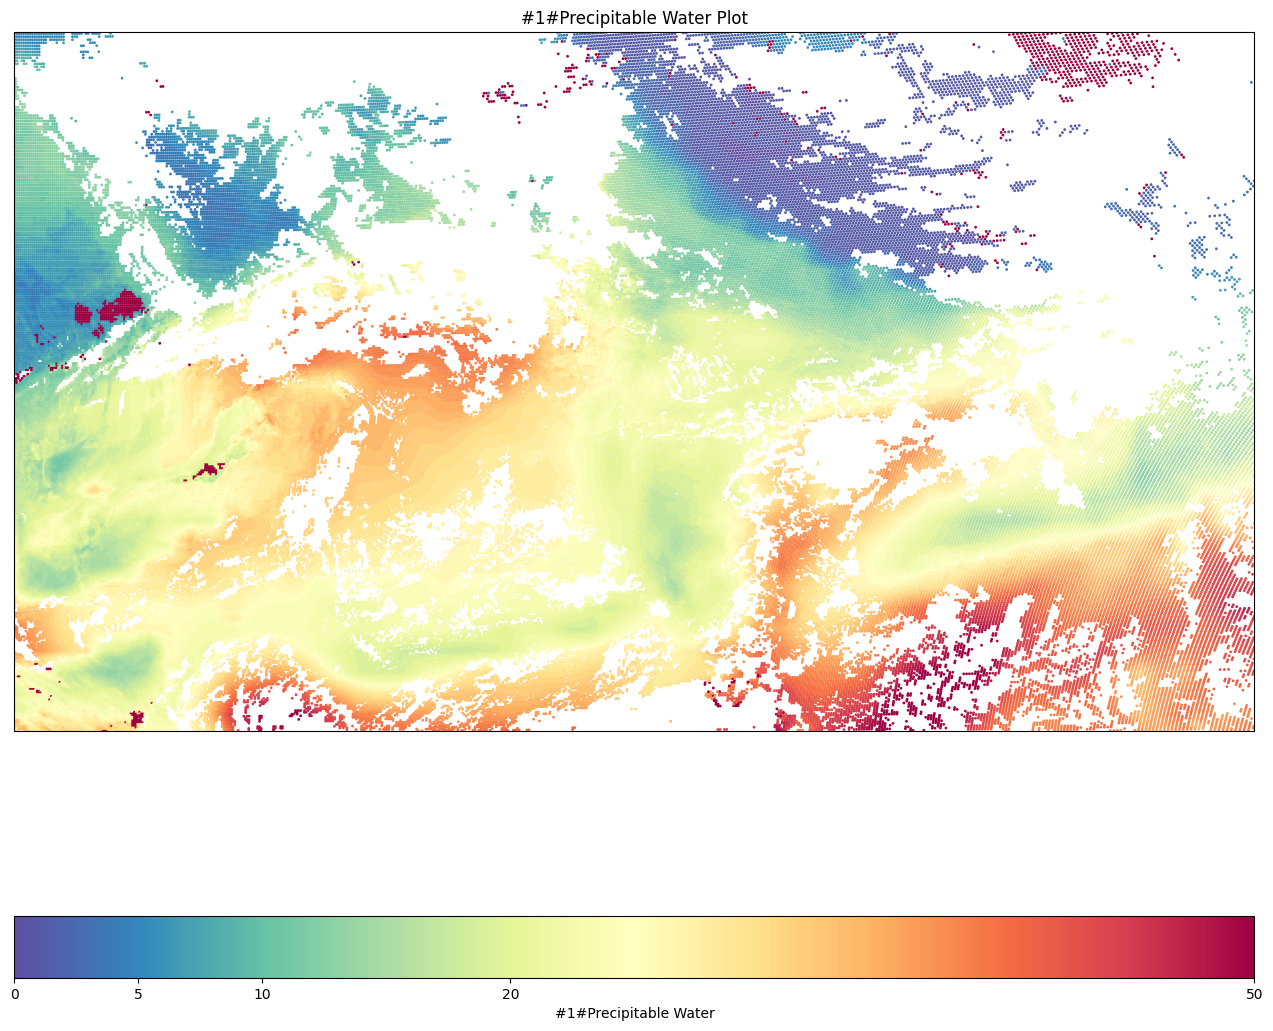

In [49]:
# GII - precipitableWater
import pdbufr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize

# Read BUFR data
productKey = '#1#precipitableWater'
productLabel = '#1#Precipitable Water'
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]
minMaxVal = [0 , 50]
ranges = [0, 5, 10, 20, 50]
_cmap = 'Spectral_r'

#df = pdbufr.read_bufr('drive/MyDrive/GII.bufr', columns=("latitude", "longitude", "kIndex", "koIndex", "precipitableWater"))

# Filter data based on latitude and longitude range
filterd_df = df[
    (df['#1#latitude'] >= latBound[0])
    & (df['#1#latitude'] <= latBound[1])
    & (df['#1#longitude'] >= lngBound[0])
    & (df['#1#longitude'] <= lngBound[1])
]

# print(filterd_df)
# Create the base map
fig = plt.figure(figsize=(16, 16))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

# Add map features
# ax.add_feature(cfeature.LAND,  facecolor='lightgray', alpha=0)
# ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=1)

norm = Normalize(vmin=minMaxVal[0], vmax=minMaxVal[1])
# Plot the KIndex
sc = ax.scatter(filterd_df['#1#longitude'], filterd_df['#1#latitude'], c=filterd_df[productKey], norm=norm, cmap=_cmap, transform=ccrs.PlateCarree(), s=1)

fig.savefig('drive/MyDrive/GII_PrecipitableWater_09-45__2024-02-02.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal', ticks=ranges)
cbar.set_label(productLabel)

# Add a title
plt.title(productLabel + ' Plot')

# Show the plot
plt.show()


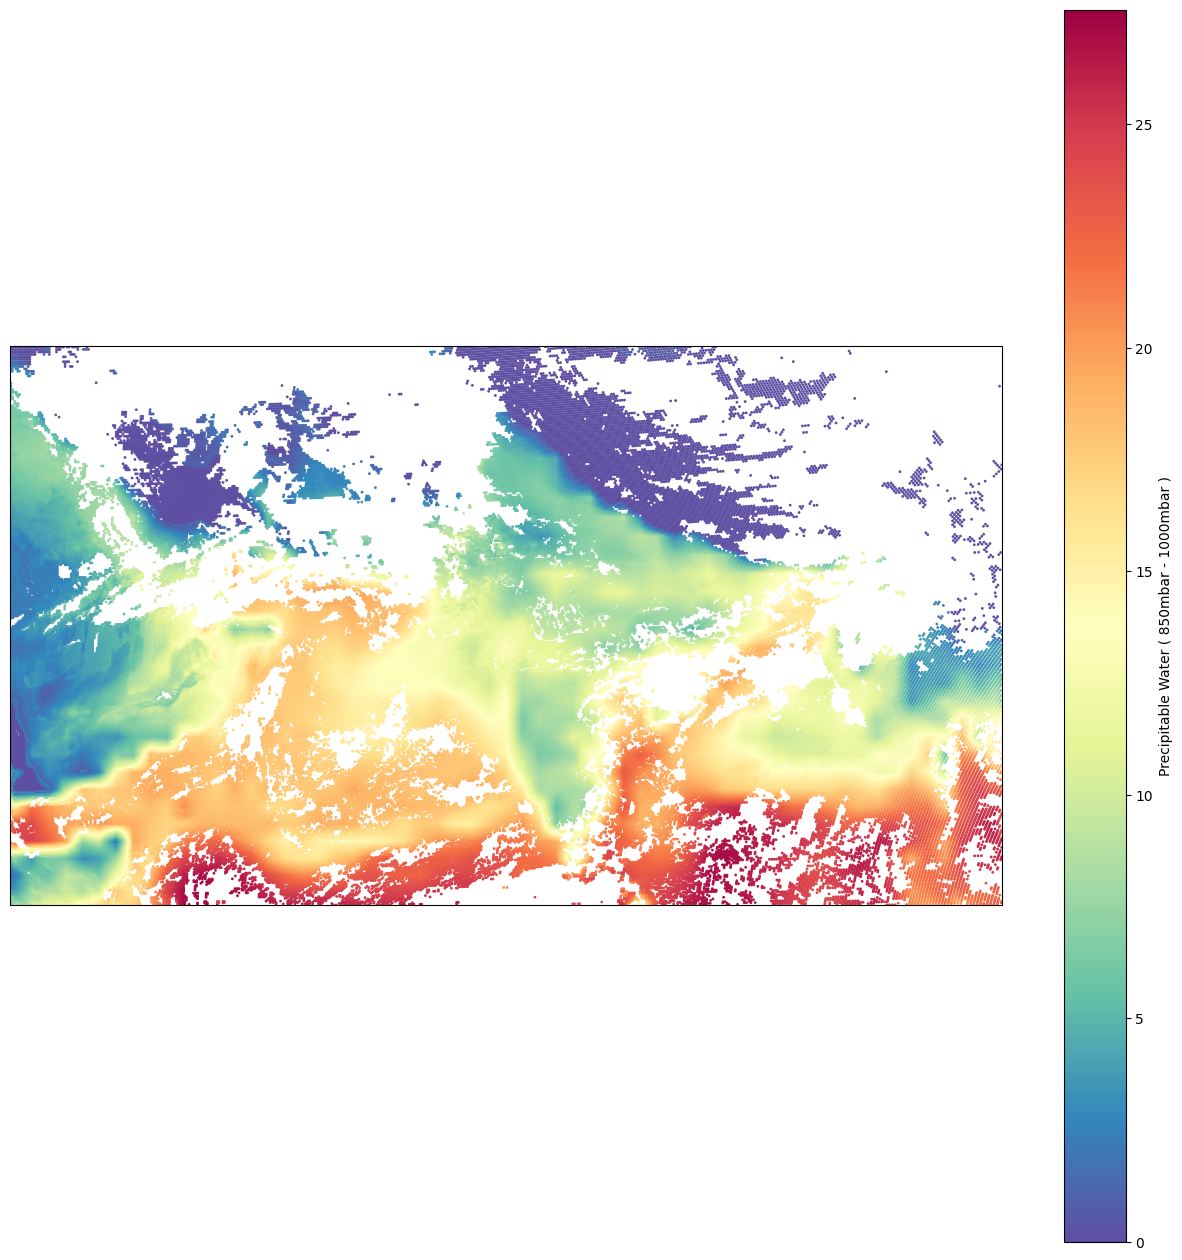

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_precipitable_water(df, productKey, productLabel, norm=None,cmap='Spectral_r'):
    latBound = [7.22, 37.454]
    lngBound = [43.753, 102.363]
    # Filter data based on latitude and longitude range
    filtered_df = df[
        (df['#1#latitude'] >= latBound[0])
        & (df['#1#latitude'] <= latBound[1])
        & (df['#1#longitude'] >= lngBound[0])
        & (df['#1#longitude'] <= lngBound[1])
    ]

    # Create the base map
    fig = plt.figure(figsize=(16, 16))
    ax = plt.axes(projection=ccrs.Mercator())
    ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND,  facecolor='white', alpha=0.1)
    ax.add_feature(cfeature.OCEAN, facecolor='white', alpha=0.1)

    sc = ax.scatter(filtered_df['#1#longitude'], filtered_df['#1#latitude'], c=filtered_df[productKey], norm=norm, cmap=cmap, transform=ccrs.PlateCarree(), s=1)

    return fig, ax, sc

# Example usage:

productKey = '#4#precipitableWater'
productLabel = 'Precipitable Water ( 850mbar - 1000mbar )'
outputPath = 'drive/MyDrive/GII_'+productLabel+'.png'
cbar_outputPath = 'drive/MyDrive/GII_'+productLabel+'_colorbar.png'
norm = Normalize(vmin=0, vmax=20)
fig, ax, sc = plot_precipitable_water(df, productKey, productLabel, norm)
cbar = plt.colorbar(sc, orientation='vertical')
cbar.set_label(productLabel)
fig.savefig(outputPath, format='png',edgecolor='none', bbox_inches='tight', pad_inches=0, transparent=True)

# plt.close(fig)
plt.show()

In [31]:
import pdbufr

# df5 = pdbufr.read_bufr('drive/MyDrive/ASR.bufr',columns="data", flat=True)

# df5.T[90:91]
# df5.T[92:93]
# df5.T[94:95]
# df5.T[97:98]
# df5.T[99:100]

# df2.T.iloc[-16:]
#1#amountSegmentCloudFree	<<< all land+sea cloud free >>> df5.T[18:19]
#2#amountSegmentCloudFree	<<< for Sea >>> df5.T[20:21]
# ----------------------------------------------------------

#1#cloudAmountInSegment	   <<<for all>>>  df5.T[22:23]
#2#cloudAmountInSegment    <<< for Low Clouds>>>  df5.T[24:25]
#3#cloudAmountInSegment    <<< for Mid Clouds>>>  df5.T[26:27]
#4#cloudAmountInSegment    <<< for High Clouds>>>  df5.T[28:29]

# ----------------------------------------------------------
#4#satelliteChannelCentreFrequency  :: 76530600000000.0   df5.T[74:75]
#4#satelliteChannelBandWidth        :: 36184200000000.0   df5.T[75:76]


#19#brightnessTemperature    <<< for all>>>  df5.T[76:77]
#20#brightnessTemperature    <<< for cloudClear>>>  df5.T[78:79]
#21#brightnessTemperature    <<< for cloud>>>  df5.T[80:81]
#22#brightnessTemperature    <<< for low cloud>>>  df5.T[83:84]
#23#brightnessTemperature    <<< for Med cloud>>>  df5.T[85:86]
#24#brightnessTemperature    <<< for High cloud>>>  df5.T[87:88]
# ----------------------------------------------------------

#5#satelliteChannelCentreFrequency  :: 48000000000000.0   df5.T[88:89]
#5#satelliteChannelBandWidth        :: 30148700000000.0   df5.T[89:90]

#25#brightnessTemperature    <<< for all>>>         df5.T[90:91]
#26#brightnessTemperature    <<< for cloudClear>>>  df5.T[92:93]
#27#brightnessTemperature    <<< for cloud>>>       df5.T[94:95]
#28#brightnessTemperature    <<< for low cloud>>>   df5.T[97:98]
#29#brightnessTemperature    <<< for Med cloud>>>   df5.T[99:100]
#30#brightnessTemperature    <<< for High cloud>>>  df5.T[101:102]
# ----------------------------------------------------------
#6#satelliteChannelCentreFrequency  :: 40816300000000.0   df5.T[102:103]
#6#satelliteChannelBandWidth        :: 11316000000000.0   df5.T[103:104]

#31#brightnessTemperature    <<< for all>>>         df5.T[104:105]
#32#brightnessTemperature    <<< for cloudClear>>>  df5.T[106:107]
#33#brightnessTemperature    <<< for cloud>>>       df5.T[108:109]
#34#brightnessTemperature    <<< for low cloud>>>   df5.T[111:112]
#35#brightnessTemperature    <<< for Med cloud>>>   df5.T[113:114]
#36#brightnessTemperature    <<< for High cloud>>>  df5.T[115:116]

# ----------------------------------------------------------
#7#satelliteChannelCentreFrequency  :: 34482800000000.0   df5.T[116:117]
#7#satelliteChannelBandWidth        :: 6395700000000.0   df5.T[117:118]

#37#brightnessTemperature    <<< for all>>>         df5.T[118:119]
#38#brightnessTemperature    <<< for cloudClear>>>  df5.T[120:121]
#39#brightnessTemperature    <<< for cloud>>>       df5.T[122:123]
#40#brightnessTemperature    <<< for low cloud>>>   df5.T[125:126]
#41#brightnessTemperature    <<< for Med cloud>>>   df5.T[127:128]
#42#brightnessTemperature    <<< for High cloud>>>  df5.T[129:130]

# ----------------------------------------------------------
#8#satelliteChannelCentreFrequency  :: 31055900000000.0   df5.T[130:131]
#8#satelliteChannelBandWidth        :: 3612800000000.0   df5.T[131:132]

#43#brightnessTemperature    <<< for all>>>         df5.T[132:133]
#44#brightnessTemperature    <<< for cloudClear>>>  df5.T[134:135]
#45#brightnessTemperature    <<< for cloud>>>       df5.T[136:137]
#46#brightnessTemperature    <<< for low cloud>>>   df5.T[139:140]
#47#brightnessTemperature    <<< for Med cloud>>>   df5.T[141:142]
#48#brightnessTemperature    <<< for High cloud>>>  df5.T[143:144]

# ----------------------------------------------------------
#9#satelliteChannelCentreFrequency  :: 27777800000000.0   df5.T[144:145]
#9#satelliteChannelBandWidth        :: 10653400000000.0   df5.T[145:146]

#49#brightnessTemperature    <<< for all>>>         df5.T[146:147]
#50#brightnessTemperature    <<< for cloudClear>>>  df5.T[148:149]
#51#brightnessTemperature    <<< for cloud>>>       df5.T[150:151]
#52#brightnessTemperature    <<< for low cloud>>>   df5.T[153:154]
#53#brightnessTemperature    <<< for Med cloud>>>   df5.T[155:156]
#54#brightnessTemperature    <<< for High cloud>>>  df5.T[157:158]

# ----------------------------------------------------------
#10#satelliteChannelCentreFrequency  :: 27777800000000.0   df5.T[158:159]
#10#satelliteChannelBandWidth        :: 10653400000000.0   df5.T[159:160]

#55#brightnessTemperature    <<< for all>>>         df5.T[160:161]
#56#brightnessTemperature    <<< for cloudClear>>>  df5.T[162:163]
#57#brightnessTemperature    <<< for cloud>>>       df5.T[164:165]
#58#brightnessTemperature    <<< for low cloud>>>   df5.T[167:168]
#59#brightnessTemperature    <<< for Med cloud>>>   df5.T[169:170]
#60#brightnessTemperature    <<< for High cloud>>>  df5.T[171:172]

# ----------------------------------------------------------
#11#satelliteChannelCentreFrequency  :: 22388100000000.0   df5.T[172:173]
#11#satelliteChannelBandWidth        :: 6835300000000.0   df5.T[173:174]

#61#brightnessTemperature    <<< for all>>>         df5.T[174:175]
#62#brightnessTemperature    <<< for cloudClear>>>  df5.T[176:177]
#63#brightnessTemperature    <<< for cloud>>>       df5.T[178:179]
#64#brightnessTemperature    <<< for low cloud>>>   df5.T[181:182]
#65#brightnessTemperature    <<< for Med cloud>>>   df5.T[183:184]
#66#brightnessTemperature    <<< for High cloud>>>  df5.T[185:186]

df5.T[:]

NameError: name 'df5' is not defined

In [32]:
import pdbufr

# df6 = pdbufr.read_bufr('drive/MyDrive/AMV.bufr',columns="data", flat=True)

df6_Headers = pdbufr.read_bufr('drive/MyDrive/AMV.bufr',columns="all", flat=True)

# df6.T[0:30]
# df6.T[30:60]

#1#satelliteChannelCentreFrequency
#1#latitude
#1#longitude

# ----------------------------------------------------------
#1#extendedHeightAssignmentMethod
#1#pressure                            :: height
#1#windDirection
#1#windSpeed
#1#u
#1#v
#1#airTemperature
#1#heightOfTopOfCloud

# ----------------------------------------------------------

#2#extendedHeightAssignmentMethod
#2#pressure                            :: maybe pressure
#2#airTemperature
#2#heightOfTopOfCloud

# ----------------------------------------------------------

#2#extendedHeightAssignmentMethod
#2#pressure                            :: maybe pressure
#2#airTemperature
#2#heightOfTopOfCloud


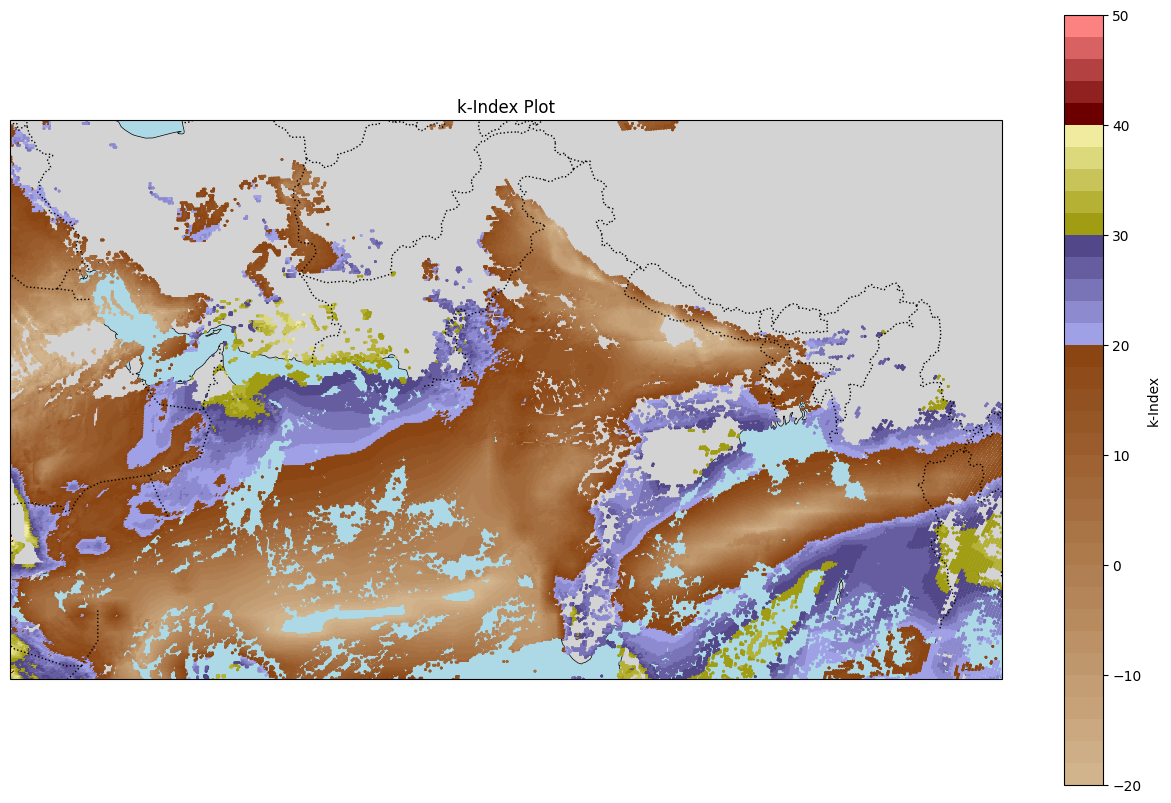

In [ ]:
#K-Index
import pdbufr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize, ListedColormap, LinearSegmentedColormap

# Read BUFR data
# (Assuming 'df' is already defined)
productKey = 'kIndex'
productLabel = 'k-Index'

# Set latitude and longitude bounds for Pakistan using Leaflet's L.latLngBounds() format
latLngBounds = [
    [37.454, 43.753],  # Upper bound (northeast)
    [7.22, 102.363]    # Lower bound (southwest)
]

# Unpack the bounds for better readability
latBound_upper, lngBound_lower = latLngBounds[0]
latBound_lower, lngBound_upper = latLngBounds[1]

minMaxVal = [-20 , 50]
ranges = [-20, -10, 0, 10, 20, 30, 40, 50]

# Filter data based on latitude and longitude range
filtered_df = df[
    (df[productKey] >= minMaxVal[0])
    & (df[productKey] <= minMaxVal[1])
]

# Create the base map with equirectangular projection
fig = plt.figure(figsize=(16, 16))
ax = plt.axes(projection=ccrs.Mercator())

# Set latitude and longitude bounds
ax.set_extent([lngBound_lower, lngBound_upper, latBound_lower, latBound_upper], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

brown_cmap = LinearSegmentedColormap.from_list('brown', ['#D2B48C', '#8B4513'], N=20)
purple_cmap = LinearSegmentedColormap.from_list('blue', ['#A0A0E6', '#524788'], N=5)
yellow_cmap = LinearSegmentedColormap.from_list('green', ['#A09D12', '#F0EB9F'], N=5)
red_cmap = LinearSegmentedColormap.from_list('red', ['#6C0000', '#FC8282'], N=5)

# Combine the custom colormaps into one
combined_cmap = ListedColormap(np.concatenate([
    brown_cmap(np.linspace(0, 1, 20)),
    purple_cmap(np.linspace(0, 1, 5)),
    yellow_cmap(np.linspace(0, 1, 5)),
    red_cmap(np.linspace(0, 1, 5)),
]))

# Define color ranges and corresponding normalization values
norm = Normalize(vmin=minMaxVal[0], vmax=minMaxVal[1])

# Plot the KIndex with the combined custom colormap
sc = ax.scatter(filtered_df['longitude'], filtered_df['latitude'], c=filtered_df[productKey],
                cmap=combined_cmap, transform=ccrs.PlateCarree(), s=1, norm=norm)

# fig.savefig('drive/MyDrive/GII_KIndex_09-45__2024-02-02.webp', format='webp', dpi=300, bbox_inches='tight',pad_inches=0)

# Add a colorbar with fixed ticks and labels
cbar = plt.colorbar(sc, ticks=ranges, orientation='vertical')
cbar.set_label(productLabel)

# Add a title
plt.title(productLabel + ' Plot')

plt.show()


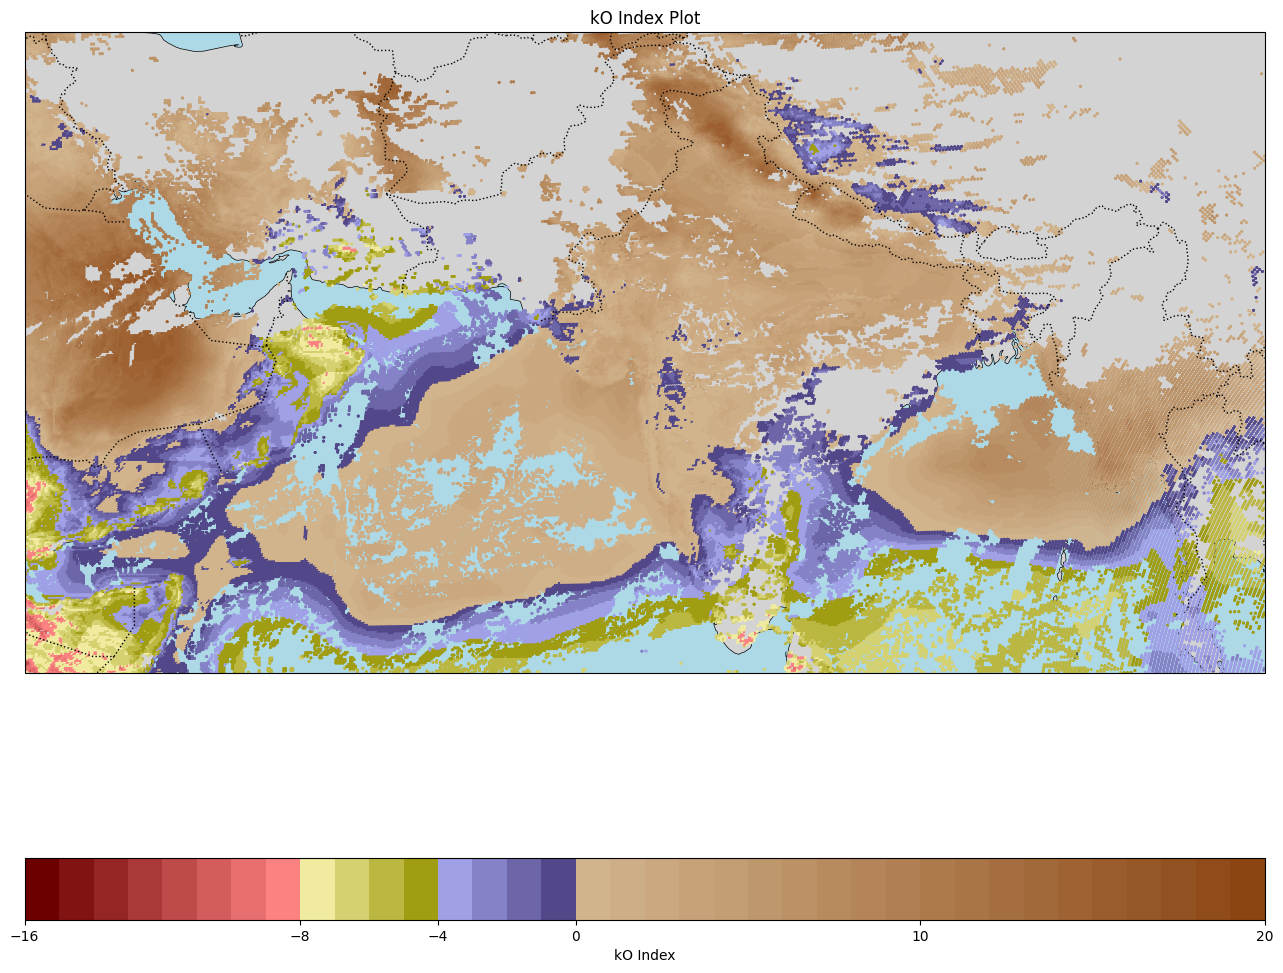

In [ ]:
# KO-INDEX
import pdbufr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize, ListedColormap, LinearSegmentedColormap

# Read BUFR data
# (Assuming 'df' is already defined)
productKey = 'parcelLiftedIndexTo500Hpa'
productLabel = 'kO Index'

# Set latitude and longitude bounds
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]
ranges = [-16 , -8 , -4 , 0 , 10 , 20]
minMaxVal = [-16 , 20]
# Filter data based on latitude and longitude range
filtered_df = df[
    (df['latitude'] >= latBound[0])
    & (df['latitude'] <= latBound[1])
    & (df['longitude'] >= lngBound[0])
    & (df['longitude'] <= lngBound[1])
    & (df[productKey] >= minMaxVal[0])
    & (df[productKey] <= minMaxVal[1])
]

# Create the base map
fig = plt.figure(figsize=(16, 16))
# fig.set_size_inches(15, 8.5)
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

brown_cmap = LinearSegmentedColormap.from_list('brown', ['#D2B48C', '#8B4513'], N=20)
purple_cmap = LinearSegmentedColormap.from_list('blue', ['#A0A0E6', '#524788'], N=4)
yellow_cmap = LinearSegmentedColormap.from_list('green', ['#F0EB9F', '#A09D12'], N=4)
red_cmap = LinearSegmentedColormap.from_list('red', ['#6C0000', '#FC8282'], N=8)

# Combine the custom colormaps into one
combined_cmap = ListedColormap(np.concatenate([
    red_cmap(np.linspace(0, 1, 8)),
    yellow_cmap(np.linspace(0, 1, 4)),
    purple_cmap(np.linspace(0, 1, 4)),
    brown_cmap(np.linspace(0, 1, 20)),
]))

# Define color ranges and corresponding normalization values
norm = Normalize(vmin=minMaxVal[0], vmax=minMaxVal[1])

# Plot the KIndex with the combined custom colormap
sc = ax.scatter(filtered_df['longitude'], filtered_df['latitude'], c=filtered_df[productKey],
                cmap=combined_cmap, transform=ccrs.PlateCarree(), s=1, norm=norm)

# Save the figure
fig.savefig('drive/MyDrive/GII_09-45__2024-02-02.webp', format='webp', dpi=300, bbox_inches='tight',pad_inches=0)

## Add a colorbar with fixed ticks and labels
cbar = plt.colorbar(sc, ticks=ranges, orientation='horizontal')
cbar.set_label(productLabel)

## Add a title
plt.title(productLabel + ' Plot')

plt.show()


        latitude  longitude      kIndex     koIndex  \
9789    23.47272  101.92325  2147483647  2147483647   
9806    23.57689  102.01413  2147483647  2147483647   
9807    23.49847  100.67494  2147483647  2147483647   
9808    23.44888   99.82112  2147483647  2147483647   
9809    23.43680   99.61211  2147483647  2147483647   
...          ...        ...         ...         ...   
405553  23.33557   44.20511          -5  2147483647   
405554  23.33569   44.11578  2147483647  2147483647   
405555  23.33616   43.93710  2147483647  2147483647   
405556  23.33630   43.84775  2147483647  2147483647   
405557  23.33656   43.75840  2147483647  2147483647   

        parcelLiftedIndexTo500Hpa  maximumBuoyancy  precipitableWater  \
9789                            1       2147483647               0.41   
9806                            0       2147483647               0.38   
9807                            2       2147483647               0.43   
9808                            1       2147483

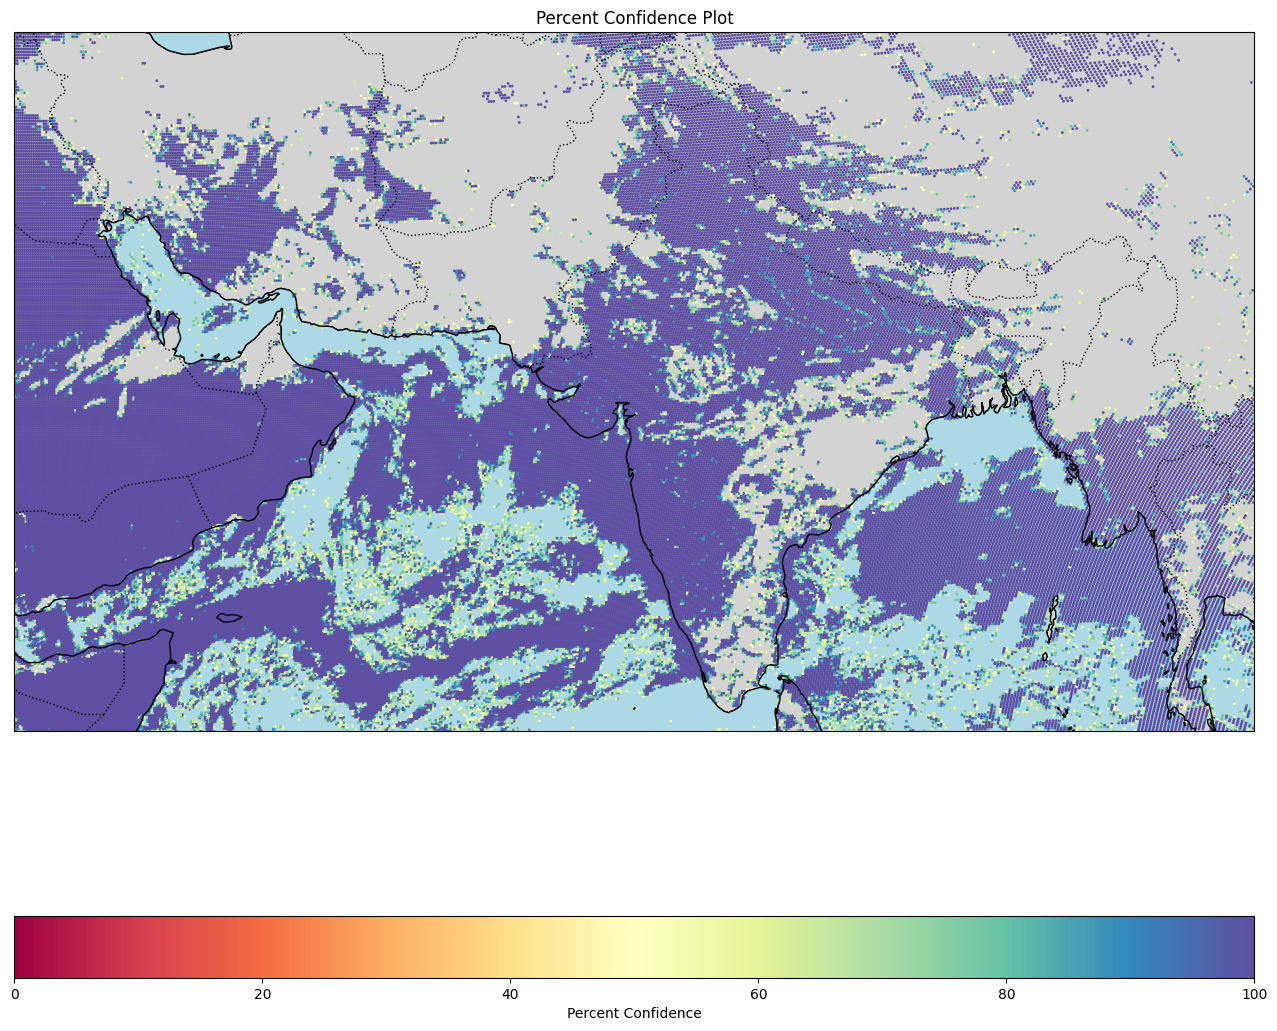

In [ ]:
# GII - percentConfidence
import pdbufr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize, ListedColormap, LinearSegmentedColormap

# Read BUFR data
productKey = 'percentConfidence'
productLabel = 'Percent Confidence'
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]
minMaxVal = [0,100]
#df = pdbufr.read_bufr('drive/MyDrive/GII.bufr', columns=("latitude", "longitude", "kIndex", "koIndex", "precipitableWater"))

# Filter data based on latitude and longitude range
filterd_df = df[
    (df['latitude'] >= latBound[0])
    & (df['latitude'] <= latBound[1])
    & (df['longitude'] >= lngBound[0])
    & (df['longitude'] <= lngBound[1])
]

print(filterd_df)
# Create the base map
fig = plt.figure(figsize=(16, 16))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

norm = Normalize(vmin=minMaxVal[0], vmax=minMaxVal[1])
# Plot the KIndex
# ValueError: 'coolwadrm' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean',...

sc = ax.scatter(filterd_df['longitude'], filterd_df['latitude'], c=filterd_df[productKey], cmap='Spectral', transform=ccrs.PlateCarree(), s=1, norm=norm)

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal')
cbar.set_label(productLabel)

# Add a title
plt.title(productLabel + ' Plot')

# Show the plot
plt.show()


In [ ]:
# GII - koIndex
import pdbufr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Read BUFR data
productKey = 'koIndex'
productLabel = 'koIndex'
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]
minMaxVal = [-30 , 30]
#df = pdbufr.read_bufr('drive/MyDrive/GII.bufr', columns=("latitude", "longitude", "kIndex", "koIndex", "precipitableWater"))

# Filter data based on latitude and longitude range
filterd_df = df[
    (df['latitude'] >= latBound[0])
    & (df['latitude'] <= latBound[1])
    & (df['longitude'] >= lngBound[0])
    & (df['longitude'] <= lngBound[1])
]

print(filterd_df)
# Create the base map
fig = plt.figure(figsize=(16, 16))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot the KIndex
# ValueError: 'coolwadrm' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean',...

norm = Normalize(vmin=minMaxVal[0], vmax=minMaxVal[1])
sc = ax.scatter(filterd_df['longitude'], filterd_df['latitude'], c=filterd_df[productKey], cmap='Spectral', transform=ccrs.PlateCarree(), s=1, norm=norm)

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal')
cbar.set_label(productLabel)

# Add a title
plt.title(productLabel + ' Plot')

# Show the plot
plt.show()


Maximum value of #3#precipitableWater: 34.85
Minimum value of #3#precipitableWater: 0.01


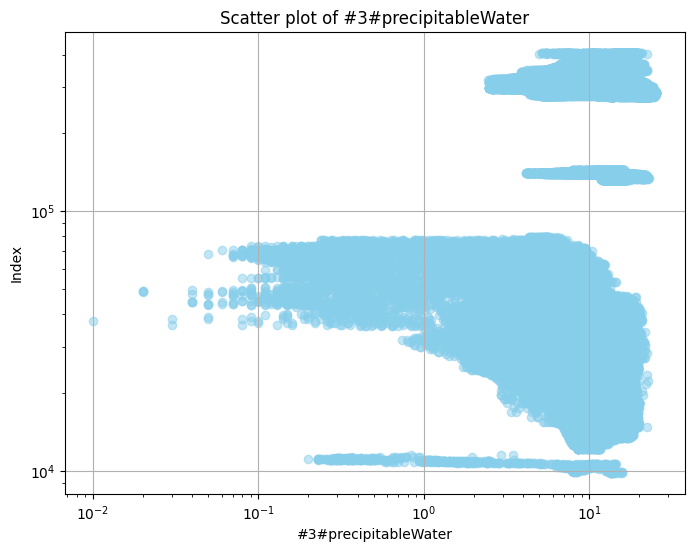

In [71]:
import pdbufr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Read BUFR data
productKey = '#3#precipitableWater'
productLabel = '#3#precipitableWater'
latKey = '#1#latitude'
lonKey = '#1#longitude'
latBound = [7.22, 37.454]
lonBound = [43.753, 102.363]

# Assuming `df` is your DataFrame with the filtered data
# df = pdbufr.read_bufr('drive/MyDrive/GII.bufr', columns=("latitude", "longitude", "kIndex", "koIndex", "precipitableWater"))

# Filter data based on latitude and longitude range
filtered_df = df[
    (df[latKey] >= latBound[0])
    & (df[latKey] <= latBound[1])
    & (df[lonKey] >= lonBound[0])
    & (df[lonKey] <= lonBound[1])
]

# Get max and min values of maximumBuoyancy
max_buoyancy = df[productKey].max()
min_buoyancy = df[productKey].min()
print("Maximum value of {}: {}".format(productLabel, max_buoyancy))
print("Minimum value of {}: {}".format(productLabel, min_buoyancy))

# Plot all values of maximumBuoyancy
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df[productKey], filtered_df.index, color='skyblue', alpha=0.5)
plt.yscale('log')  # Set y-scale to logarithmic
plt.xscale('log')  # Set y-scale to logarithmic

plt.xlabel(productLabel)
plt.ylabel('Index')
plt.title('Scatter plot of ' + productLabel)
plt.grid(True)
plt.show()
